<a href="https://colab.research.google.com/github/Alejandro3009/ADA-Informes/blob/main/Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Select Algorithm y problemas de búsqueda**

#1. Descripción del problema

El problema al que se va a enfrentar ahora es un problema de encontrar el I-esimo elemento más pequeño de una lista de elementos, o dicho de manera más formal encontrar un **estadístico de orden**.

Por lo tanto, se tiene como entrada: un arreglo de tamaño $n$, el i-esimo elemento buscado.

Y como salida se tiene: el valor del i-esimo elemento.

los estadísticos de orden son una de las herramientas fundamentales de la estadística no paramétrica y de inferencia, y por ello encontrar estos estadísticos es uno de los problemas más comunes en la estadística.


#2. Descripción del algoritmo

El algoritmo **Select** es un algoritmo de búsqueda el cual utiliza la misma metodología que el **Quick Sort** para encontrar al elemento, está siendo la de seleccionar un pivote y de ahí partir el arreglo es dos partes, una va a ser todos los elementos menores al pivote y la otra todos los mayores.

Aparte de esto el algoritmo **Select** es un algoritmo el cual es muy estable por la manera que utiliza para encontrar el pivote de la función **partition**

a continuación, se explicarán cada una de las funciones implementadas en esta versión del algoritmo.


###Mediana

La función **mediana** es la función que encuentra un pivote dentro de una sección del arreglo, para ello esta función primero ordena esta sección del arreglo, para luego seleccionar el pivote según su mediana, la cual se encontrar en el elemento medio o en el menor elemento medio.

###Ejemplo

La progresión del algoritmo va estar marcado por este símbolo $->$; L será la longitud del arreglo y una apostrofe ($'$) denotará la selección de algún elemento.

L = 5; arreglo: $[30,12,2,6,21]$

$[30,12,2,6,21]$ $->$ $[2,6,12,21,30]$ $->$ $L//2 = 2.5 = 2$ $->$ $[2,6,12',21,30]$ $->$ la mediana del arreglo es 12.

L = 2; arreglo: $[10,2]$

$[10,2]$ $->$ $[2,10]$ $->$ $L/2 - 1 = 0$ $->$ $[2',10]$ $->$ la mediana del arreglo es 2.


In [ ]:
def mediana(A,cont):
  A,parcial = insertcion_sort(A)
  if len(A) % 2 == 1:
    i = len(A)//2
    return A[i],cont + parcial
  else:
    i = len(A)//2 - 1
    return A[i],cont + parcial

###Pivot select

La función **pivot select** con la ayuda de la función **mediana** va seleccionar el pivote de la función **partition**, para lograr esto la función va a seguir los siguientes pasos:

* recibir un arreglo el cual lo va a partir en sub-arreglos (de tamaño máximo 5)
* estos sub-arreglos se le sacarán la mediana a través de la función **mediana** las cuales se colocarán en un nuevo arreglo
* si este arreglo tiene más de 5 elementos se vuelve a repetir el proceso
* si no se pasa por última vez el arreglo por la función **mediana** esto regresará el elemento el cual será el pivote para la función **partition**

###Ejemplo

La progresión del algoritmo va estar marcado por este símbolo $->$ y una apostrofe ($'$) denotara la selección de algún elemento.

arreglo: $[30,12,2,6,21,7,10,15]$

$[30,12,2,6,21,7,10,15]$ $->$ $[30,12,2,6,21]$ | $[7,10,15]$ $->$ se pasan los arreglos por la función **mediana** $->$ $[2,6,12',21,30]$ | $[7,10`,15]$ = $[12,10]$ $->$ se pasa el arreglo de medianas por la función **mediana** $->$ $[10`,12]$ $->$ el pivote va a ser 10


In [103]:
def pivotSelect(A,verbose):
  arr = []
  aux = []
  total = 0

  if len(A) == 1:
    return A[0],1

  if(verbose):
    print("primero se divide el arreglo en sub-arreglos de tamaño 5")
  for i in range(0,len(A)):
    aux.append(A[i])
    if len(aux) >= 5:
      arr.append(aux)
      aux = []
      total += 1

  if(len(aux) != 0):
    arr.append(aux)
    aux = []

  if(verbose):
    print("despues de este proceso nos queda el siguiente grupo de arreglos")
    print(arr,"\n")
    print("ahora a estos sub-arreglos le vamos a sacar las medianas")
  
  for i in range(0,len(arr)):
    k,total = mediana(arr[i],total)
    aux.append(k)
  
  if(verbose):
    print("despues de sacarles las medianas nos queda el siguiente arreglos con ellas")
    print(aux,"\n")
  
  if len(aux) > 5:
    if(verbose):
      print("como hay mas de 5 elementos en el arreglo se vuelve a repetir el proceso")
    k,cont = pivotSelect(aux)
    return k,total + cont
  else:
    if(verbose):
      print("ya que hay menos de 5 elemntos en el arreglo se va a volver a sacar la mediana del arreglo,")
      print("y esta mediana va a ser el pivote que necesitamos")
    k,total = mediana(aux,total)
    return k,total

###Partition

La función **partition** con el pivote entregado por la función **pivot select** se van a dividir en secciones según el pivote, para ello se utiliza una **serie de índices** los cuales van a marcar los puntos de división dentro del arreglo, para lograr esto la función va a seguir los siguientes pasos:

* la función compara un elemento del arreglo con el pivote
* si este elemento es mayor al pivote, un índice i va a avanzar un lugar, esto significa que el elemento se encuentra dentro del conjunto i.
* si este elemento es menor al pivote: 
1. el último elemento de i va a intercambiar posiciones con el elemento que se está comparando
2. después de esto el índice i va avanzar un lugar y a su vez un índice j va a avanzar un lugar
* este proceso se repite hasta que se analizan todos los elementos.

Al final del proceso quedaran marcados por un par índices, donde empiezan y terminan las dos secciones del arreglo. Los elementos menores o iguales al pivote estarán en el rango $[0, j]$ y los elementos mayores al pivote estarán en el rango $[j+1, i]$

###Ejemplo

La progresión del algoritmo va estar marcado por este símbolo $->$; $j$ e $i$ estos serán índices que indicaran donde terminan la división de elementos menores al pivote y la división de elementos mayores al pivote; el cual se destacara con una apostrofe ($'$).

arreglo: $[30,12,2,6,21]$

$[30,12',2,6,21]$ $->$ $30 > 12$ $->$ $[30i,12',2,6,21]$ $->$ $2 < 12$ $->$ $[2,12',30i,6,21]$ $->$ $[2j,12',30i,6,21]$ $->$ $6 < 12$ $->$ $[2j,12',6,30i,21]$ $->$ $[2,12',6j,30i,21]$ $->$ $21 > 12$ $->$ $[2,12',6j,30,21i]$ $->$ $[2,6j,12',30,21i]$



In [101]:
def partition(A,posPivote,contador,Verbose):
  piv = A[posPivote]
  if(Verbose):
    print("el arreglo que se va a ordenar: ",A,"\n")
  
  longitud = len(A)
  i = -1
  j = 0
  aux = 0

  for j in range(0,longitud):
    if(j == posPivote):
      contador+=1
      continue
    elif(A[j] <= piv):
      i += 1
      if(i == posPivote):
        contador+=1
        i += 1
      aux = A[i]
      A[i] = A[j]
      A[j] = aux
      contador+=1

  if(Verbose):
    print("sub-arreglo de los elementos menores al pivote: ",A[0:i+1])
    print("sub-arreglo de los elementos mayores al pivote: ",A[i+1:],"\n")

  if(posPivote <= i):
    aux = A[i]
    A[i] = A[posPivote]
    A[posPivote] = aux
    contador+=1
    return A,i,contador
  else:
    aux = A[i+1]
    A[i+1] = A[posPivote]
    A[posPivote] = aux
    contador+=1
    return A,i+1,contador

### Selection

la función **selection** es la función principal la cual busca el **I-esimo** de una lista, esto lo logra con la ayuda de las funciones **pivot select**, **mediana** y **partition** la última siendo la más importante para su funcionamiento.

La función va a seleccionar un pivote utilizando **pivot select**, con el cual va a ordenar el arreglo utilizando **partition**, una vez ordenado el arreglo este evalúa si la posición del pivote dentro del arreglo es la **I-esima**, si lo es; se devuelve el valor del pivote, si no lo es; se vuelve a repetir el proceso hasta encontrar el **I-esimo** elemento.

###Ejemplo

La progresión del algoritmo va estar marcado por este símbolo $->$; el pivote será marcado con una apostrofe ($'$).

Arreglo: $[3,7,8,1,4,6,9,2]$, i-esimo elemento = 6

$[3,7,8,1,4,6,9,2]$ $->$ se selecciona el pivote $->$ $[3,7,8,1,4,6,9,2] piv = 4$ $->$ se llama al partition $->$ $[3,1,2,4`,7,8,6,9]$ $->$ 4 es el cuarto menor elemento así que repetimos el proceso y como nuestro elemento es menor al que buscamos trabajamos con el arreglo derecho.

Arreglo: $[7,8,6,9]$, i-esimo elemento = 6, último elemento = 5

$[7,8,6,9]$ $->$ se selecciona el pivote $->$ $[7,8,6,9] piv = 8$ $->$ se llama al partition $->$ $[6,7,8`,9]$ $->$ se suma cuantos elementos hay antes del pivote al último elemento $->$ el 8 es el séptimo menor elemento así que repetimos el proceso y como nuestro elemento es mayor al que buscamos trabajamos con el arreglo izquierdo.

Arreglo: $[6,7]$, i-esimo elemento = 6, último elemento = 5

$[6,7]$ $->$ se selecciona el pivote $->$ $[6,7] piv = 6$ $->$ se llama al partition $->$ $[6`,7]$ $->$ se suma cuantos elementos hay antes del pivote al último elemento $->$ 6 es el quinto menor elemento así que repetimos el proceso y como nuestro elemento es menor al que buscamos trabajamos con el arreglo derecho.

Arreglo: $[7]$, i-esimo elemento = 6, último elemento = 6

como solo nos queda el 7 como elemento en el arreglo, sabemos que el 7 es el sexto menor elemento del arreglo, como llegamos a la respuesta la función va a regresar el número 7.


In [104]:
def selection (A,iEsimo,posPivote,verbose = False):
  if len(A) == 1:
    return A[0],1
  
  if(verbose):
    print("primero buscaremos la mediana del arreglo la cual sera el pivote que utilizaremos para arreglar el arreglo \n")
  piv,cont = pivotSelect(A,verbose)

  if(verbose):
    print("una vez encontrado el elemento medio ",piv)
  for i in range(0,len(A)):
    if A[i] == piv:
      break
  if(verbose):
    print("el cual se encuentra en la posicion",i,"del arreglo \n")
    print("con esto ahora ordenaremos el arreglo segun el pivote")

  A,piv,cont = partition(A,i,cont,verbose)
  posPivote = posPivote + piv+1

  if(verbose):
    print("una vez ordenado el arreglo tendremos que",A)
    print("nuestro pivote se encuentra en la posicion",piv,"del arreglo")
    print("en esta posicion el elemento del pivote seria el",posPivote)

  if posPivote == iEsimo:
    if(verbose):
      print("y como en esta poscion el elemento es el i-esimo sera este el cual regresaremos")
    return A[piv],cont
  elif posPivote > iEsimo:
    if(verbose):
      print("y como en esta poscion el elemento es mayor al iEsimo se repira el procede a repetir el proceso con el la parte izquierda del arreglo \n")
    piv,total = selection(A[0:piv],iEsimo,0,verbose)
    return piv,(total + cont)
  else:
    if(verbose):
      print("y como en esta poscion el elemento es menor al iEsimo se repira el procede a repetir el proceso con el la parte derecha del arreglo \n")
    piv,total = selection(A[piv+1:len(A)],iEsimo,piv+1,verbose)
    return piv,(total + cont)

#ejemplo
A = [3,7,8,1,5,6,9,4]
print("entrada: ", A)
valor,cont = selection(A,6,0)
print("salida: ", valor)
print("numero de comparaciones: ", cont)

entrada:  [3, 7, 8, 1, 5, 6, 9, 4]
salida:  7
numero de comparaciones:  26


##2.4. Ejecución del algoritmo paso a paso (verbose=True)

A continuación, hay otra ejecución del código esta vez mostrando el paso a paso de este, esta opción se habilita cuando $verbose = True$.

In [105]:
A = random.sample(range(1, 20), 8)
i_esimo = random.randint(1,8)
print("el arreglo de entrada: ",A,"  el i-esimo elemento buscado es: ",i_esimo,"\n")
valor,cont = selection(A,i_esimo,0,True)
print("salida: ", valor)
print("numero de comparaciones: ", cont)

el arreglo de entrada:  [17, 1, 6, 11, 19, 8, 7, 4]   el i-esimo elemento buscado es:  5 

primero buscaremos la mediana del arreglo la cual sera el pivote que utilizaremos para arreglar el arreglo 

primero se divide el arreglo en sub-arreglos de tamaño 5
despues de este proceso nos queda el siguiente grupo de arreglos
[[17, 1, 6, 11, 19], [8, 7, 4]] 

ahora a estos sub-arreglos le vamos a sacar las medianas
despues de sacarles las medianas nos queda el siguiente arreglos con ellas
[11, 7] 

ya que hay menos de 5 elemntos en el arreglo se va a volver a sacar la mediana del arreglo,
y esta mediana va a ser el pivote que necesitamos
una vez encontrado el elemento medio  7
el cual se encuentra en la posicion 6 del arreglo 

con esto ahora ordenaremos el arreglo segun el pivote
el arreglo que se va a ordenar:  [17, 1, 6, 11, 19, 8, 7, 4] 

sub-arreglo de los elementos menores al pivote:  [1, 6, 4]
sub-arreglo de los elementos mayores al pivote:  [11, 19, 8, 7, 17] 

una vez ordenado el ar

#3. Tiempo de Ejecución

Para calcular el tiempo de ejecución se deben tener en cuenta el tiempo de ejecución de cada función, el pivot Select nos da $T(n) = n/5$ debido a que divide en sub-arreglos. El $insertion sort$ en caso promedio tiene complejidad de $O(n^2)$, pero como es un tamaño constante en este caso podría tomarse como $O(1)$. La función partition debiese ser un $O(n)$ puesto que recorre hasta n-1 comparando los datos. Y por último la función $Pivot Select$ como divide y calcula la mediana de los datos que es mayor a $3n/10 +6$, por lo que es una complejidad de O(n).

Como podemos ver, gracias al método de mediana de medianas (pivot select) la complejidad del algoritmo es $O(n)$, este método surgió de la idea de reducir el tiempo de ejecución que tenía el algoritmo que solamente utilizaba el partition, el cual tenía una complejidad de $O(nlogn)$.


# 4. Correctitud de Select

Nuestra hipótesis P(n) es que la función *Select* recibe un arreglo y un índice *k* que corresponde al estadístico de orden k°, y retorna el valor del estadístico.

En el caso base, cuando *n = 1*, el estadístico de orden es el único elemento contenido en el arreglo. Por lo tanto, se cumple la hipótesis.

Para el paso inductivo, probaremos P(m). Si *n > 1*, entonces se busca un pivote óptimo y se divide el arreglo con Partition. Luego de la división, si la posición del pivote es diferente de *k*, se llama recursivamente Select utilizando una de las dos mitades. El nuevo largo del arreglo es, en el peor caso, *7n/10*. Como *m < n*, el largo va a converger en 1 eventualmente si no se cumple que *pivote = k* antes. Por lo tanto, el algoritmo es correcto.


#5. Experimentos

Ahora realizaremos un numero de experimentos que nos ayudaran a visualizar la eficacia del **select** en ciertos aspectos.

##5.1. Numero de comparaciones

En este experimento se comprobará el número de comparaciones que el algoritmo **select** necesita realizar para poder encontrar el I=esimo elemento de una lista.

Para ello se hizo una gráfica en la que se muestra.

* La cantidad de comparaciones del peor caso calculadas matemáticamente,
* La cantidad de comparaciones del mejor caso calculadas matemáticamente
* La cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para un problema que tiene un tamaño $n \in [5,100]$


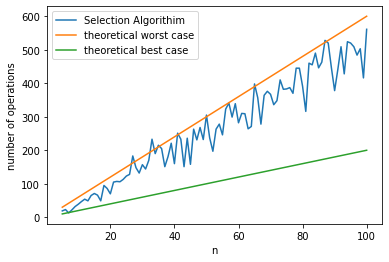

In [75]:
import matplotlib.pyplot as plt
import random

x=[n for n in range(5,101)] 
y1=[6*n for n in range(5,101)] # worst case
y2=[2*n for n in range(5,101)] # best case
y=[]; 

for n in range(5,101):
  a = random.sample(range(1, 200), n)
  i_esimo = random.randint(1,n+1)
  a,counter = selection(a,i_esimo,0)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Selection Algorithim", "theoretical worst case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

###Análisis

Como se puede apreciar en la gráfica, la función se encuentra dentro del rango esperado, algo que se puede resaltar es lo errático de los resultados, teniendo muchos valles y picos a lo largo de la ejecución, esto puede ser debido a la implementación de la función.


##5.2. Comparación entre algoritmos

En este experimento se compararán dos algoritmos de búsqueda el **Select** y el **Randomized select**, en específico se comparará el número de comparaciones que realizan ambos algoritmos.

Como el nombre sugiere el **Randomized select** funciona de la misma manera que el select, pero en este caso el pivote no estará dado por la mediana, si no que será un pivote aleatorio en el arreglo.

Para ello se hizo una gráfica en la que se muestra.

* La cantidad de comparaciones que el **Select** realiza (la gráfica azul)
* La cantidad de comparaciones que el **Randomized select** realiza (la gráfica naranja)

para un problema que tiene un tamaño $n \in [5,100]$


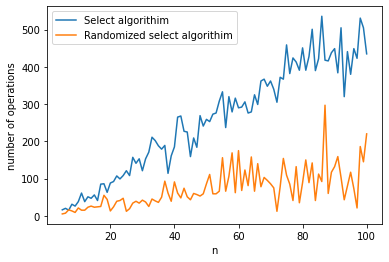

In [91]:
import matplotlib.pyplot as plt

x=[n for n in range(5,101)] 
y1=[]; y2=[]

for n in range(5,101):
  a = random.sample(range(1, 200), n)
  i_esimo = random.randint(1,n+1)

  b,counter = selection(a,i_esimo,0)
  y1.append(counter)

  b,counter = R_select(a,i_esimo,0)
  y2.append(counter)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select algorithim","Randomized select algorithim"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

###Análisis

Como se puede observar en la gráfica, el **select** es menos eficiente que el **R select** (randomized select), esto es de esperarse, ya que a diferencia del **R select** que selecciona aleatoriamente su pivote. El **select** hace un análisis para seleccionar un pivote que se encuentre en **la mediana del arreglo**, esto hace que el algoritmo necesite realizar más comparaciones entre sus elementos para encontrar al pivote.


##5.3. Tiempo de ejecución experimental

En el siguiente experimento se vera cual es el tiempo de ejecucion del algoritmo **select**.

También se estara comparando a este algoritmo con el algoritmo **randomized select**.

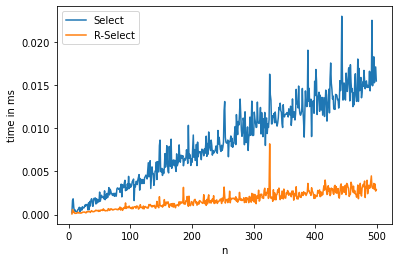

In [94]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
x1=[]; y1=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  i_esimo = random.randint(1,n+1)

  #la función repeat está ejecutando 20 veces cada algoritmo con el arreglo a y retorna el mejor tiepo obtenido para cada uno.
  t = repeat(setup="from __main__ import selection", stmt=f"selection({a},{i_esimo},{0})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  t = repeat(setup="from __main__ import R_select", stmt=f"R_select({a},{i_esimo},{0})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)

plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["Select", "R-Select"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

###Análisis

Como se puede observar en la gráfica, el **select** es menos eficiente que el **R select**, esto a pesar de que pueda ocurrir no se debería ver como en la gráfica, ya que el algoritmo **select** selecciona su pivote de manera más inteligente, esto debería a ayudar a encontrar al i-esimo elemento de manera más rápida cuando los arreglos tienen tamaños pequeños.

Pero a medida que aumentamos el tamaño del arreglo el proceso de encontrar la mediana, este proceso empieza a ralentizar al algoritmo, para tal punto el **R select** se vuelve más eficiente por el hecho de no hacer ese proceso


#6. Anexos

##6.1. codigo del algoritmo insertcion sort

In [ ]:
def insertcion_sort(a,verbose = False):
  n = len(a) ##longitud del arreglo
  aux = 0 ##dato que auxilia al intercambio de datos
  c = 0 ##contador de comparaciones
  
  if(verbose):print("arreglo de entrada: ",a)

  for i in range(0,n): ##ciclo principal que se mueve a travez del arreglo
    k = i
    if(verbose):print("analisis de datos N°",i)
    while k > 0: ##ciclo que empieza a hacer las comparaciones
      if(verbose and k-1 != 0):
          print(str(a[:k-1])[1:-1],",",colored(f"{str(a[k-1:k+1])[1:-1]}","red"),",",str(a[k+1:])[1:-1],"\n")
      elif(verbose and k-1 == 0):
        print(colored(f"{str(a[k-1:k+1])[1:-1]}","red"),",",str(a[k+1:])[1:-1],"\n")
        
      if(a[k] < a[k-1]):
        aux = a[k-1]
        a[k-1] = a[k]
        a[k] = aux
        c = c + 1
        k = k - 1
        if(verbose and k != 0):
          print(str(a[:k])[1:-1],",",colored(f"{str(a[k:k+2])[1:-1]}","green"),",",str(a[k+2:])[1:-1],"\n")
        elif(verbose and k == 0):
          print(colored(f"{str(a[k:k+2])[1:-1]}","green"),",",str(a[k+2:])[1:-1],"\n")
      else: 
        c = c + 1
        break
    
    if(verbose):
      print("lo revisado esta ordenado")
      print(colored(f"{str(a[:i+1])[1:-1]}","blue"),",",str(a[i+1:])[1:-1],"\n")
    if(i == n and verbose):
      print("ya esta completamente ordenado")
    
  return a,c

##6.2. Codigo randomized select


In [90]:
def R_select (A,iEsimo,posPivote,verbose = False):
  if len(A) <= 1:
    return 0,1

  piv = random.randint(0,len(A)-1)
  
  A,piv,cont = partition(A,piv,0,verbose)
  posPivote = posPivote + piv+1

  if posPivote == iEsimo:
    return A[piv],cont
  elif posPivote > iEsimo:
    piv,total = R_select(A[0:piv],iEsimo,0,verbose)
    return piv,(total + cont)
  else:
    piv,total = R_select(A[piv+1:len(A)],iEsimo,piv+1,verbose)
    return piv,(total + cont)